In [3]:
import numpy as np
import math as m
from matplotlib import pyplot as plt

In [4]:
D = 0.1
n= 256
dx = 1
Matr_D = np.zeros((n,n))
x = np.zeros(n)

for i in range(0,n):
    x[i] = i - 254/2
u0 = np.zeros(n)
for i in range(n):
    u0[i] = m.exp(-x[i]*x[i]/200)
    #u0[i] = i

for i in  range(len(Matr_D)):
    Matr_D[i][i] = -2*D
    if i < n-1:
        Matr_D[i][i+1] = D
        Matr_D[i+1][i] = D
Matr_D[0][0] = -D
Matr_D[n-1][n-1] = -D
Matr_D

array([[-0.1,  0.1,  0. , ...,  0. ,  0. ,  0. ],
       [ 0.1, -0.2,  0.1, ...,  0. ,  0. ,  0. ],
       [ 0. ,  0.1, -0.2, ...,  0. ,  0. ,  0. ],
       ...,
       [ 0. ,  0. ,  0. , ..., -0.2,  0.1,  0. ],
       [ 0. ,  0. ,  0. , ...,  0.1, -0.2,  0.1],
       [ 0. ,  0. ,  0. , ...,  0. ,  0.1, -0.1]])

In [5]:
def du_dt(A,u0,dt):
    du = np.zeros(len(u0))
    du[0] = (Matr_D[0][0]*u0[0] + Matr_D[0][1]*u0[1])*dt
    for i in  range(1,n-1):
        du[i] =  (Matr_D[i][i-1]*u0[i-1] + Matr_D[i][i]*u0[i] + Matr_D[i][i+1]*u0[i+1])*dt
    du[n-1] = (Matr_D[n-1][n-2]*u0[n-2] + Matr_D[n-1][n-1]*u0[n-1])*dt
    #du = np.dot(A,u0)
    for u in du:
        u = u*dt
    return du

In [6]:
t0 = 0
t10 = 10
dt = 0.01
u10 = u0
du = np.zeros(len(u0))
while t0<t10:
    tmp = du_dt(Matr_D,u10,dt)
    u10 = np.add(u10,tmp)
    t0 += dt

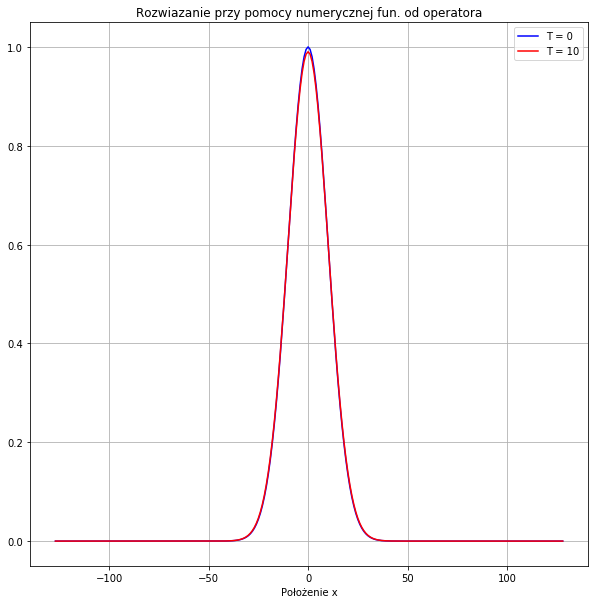

In [9]:
plt.figure(figsize=(10, 10))
plt.xlabel("Położenie x")
plt.title('Rozwiazanie przy pomocy numerycznej fun. od operatora')
plt.plot(x,u0,label = 'T = 0',color = 'b')
plt.plot(x,u10,label = 'T = 10',color = 'r')
plt.legend()
plt.grid()
plt.savefig("zad7-num.png")
plt.show()